### ANALYZING HOUSING PRICE DETERMINATOR DATASET

# 1. SETTING UP ENVIRONMENT 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
# sns = sns  # Seaborn is not imported in this snippet
import seaborn as sns
import matplotlib as mpl

# # Set global display options for pandas
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.width', 1000)       # Adjust column width
# pd.set_option('display.colheader_justify', 'center')  # Center column headers


### Data Ingestion 

In [2]:
# Data ingestion
data=pd.read_csv("Housing.csv")


## BASIC INVESTIGATION

In [3]:
# Checking the head and tail of the data
display(data.head())  
display(data.tail())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
# Checking the shape of the data and some basic statistics
display("Number of rows:", data.shape[0])
display("Shape of the data:", data.shape)
display(data.describe())
display(data.info())

'Number of rows:'

545

'Shape of the data:'

(545, 13)

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

In [5]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [6]:
# Value counts for categorical variables
display(data['bedrooms'].value_counts())
display(data['bathrooms'].value_counts())
display(data['furnishingstatus'].value_counts())
display(data['airconditioning'].value_counts())
# display(data['floors'].value_counts())
# display(data['waterfront'].value_counts())
# display(data['view'].value_counts())
# display(data['condition'].value_counts())
# display(data['grade'].value_counts())
# display(data['sqft_basement'].value_counts())
# display(data['yr_built'].value_counts())
# display(data['yr_renovated'].value_counts())
# display(data['zipcode'].value_counts())

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [7]:

#Basic Investigation
display(data.head())
display(data.describe())
display(data.info())
display(data['bedrooms'].value_counts())
display(data['bathrooms'].value_counts())
# display(data['price'].value_counts())

# data.style.set_properties(**{'text-align': 'center'}).set_table_styles(
#     [{'selector': 'th', 'props': [('text-align', 'center')]}]
# )


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

<!-- ## EXPLORATORY DATA ANALYSIS -->

# Data structure and Data cleaning


In [8]:
# Finding missing values
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])

Series([], dtype: int64)

In [9]:
# finding duplicates in the data
# Find duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
display(duplicate_rows)

Number of duplicate rows: 0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [10]:
display(data.describe()) # Get summary statistics for all columns
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Number of duplicate rows: 0


In [11]:
# Detecting ouliers in the data
# Using skewness to identify potential outliers
skewness = data['price'].skew()
display("Skewness of numerical columns:")
display(skewness[skewness > 1])  # Display columns with skewness > 1

'Skewness of numerical columns:'

array([1.21223884])

In [12]:
skewness = data['area'].skew()
display("Skewness of numerical columns:")
display(skewness[skewness > 1])  # Display columns with skewness > 1

'Skewness of numerical columns:'

array([1.32118834])

In [13]:
skewness = data['bedrooms'].skew()
display("Skewness of numerical columns:")
display(skewness[skewness > 1])  # Display columns with skewness > 1

'Skewness of numerical columns:'

array([], dtype=float64)

In [14]:
skewness = data['bathrooms'].skew()
display("Skewness of numerical columns:")
display(skewness[skewness > 1])  # Display columns with skewness > 1

'Skewness of numerical columns:'

array([1.58926358])

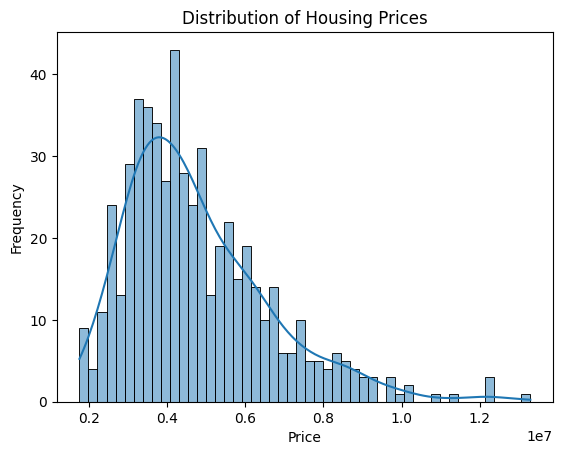

In [15]:
sns.histplot(data['price'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



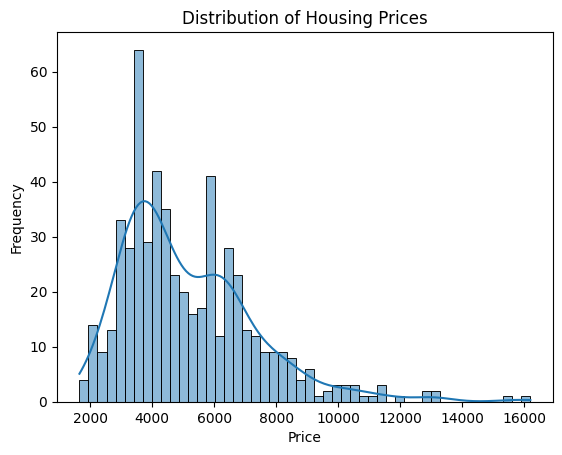

In [16]:
sns.histplot(data['area'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


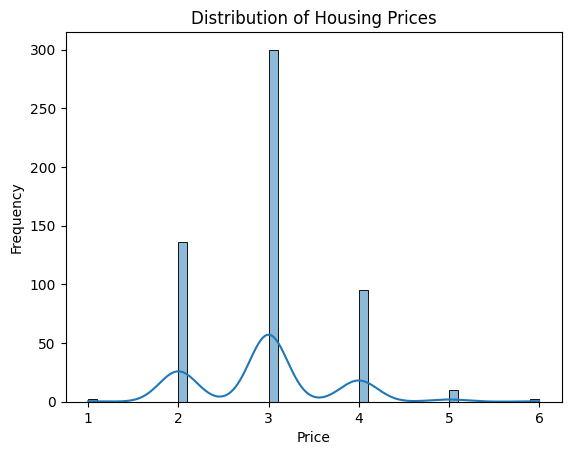

In [17]:
sns.histplot(data['bedrooms'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


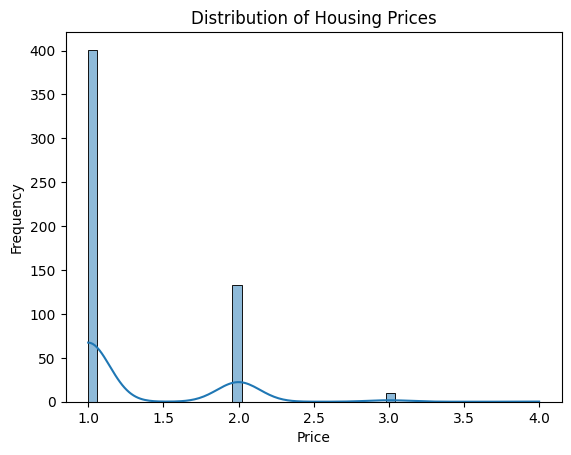

In [18]:
sns.histplot(data['bathrooms'], bins=50, kde=True)
plt.title("Distribution of Housing Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [19]:
# Reducing the effect of outliers
# data['price'] = np.sqrt(data['price'])
# data['area'] = np.sqrt(data['area'])
# data['bedrooms'] = np.sqrt(data['bedrooms'])
# data['bathrooms'] = np.sqrt(data['bathrooms'])

In [20]:
skewness = data['price'].skew()
display(skewness)

np.float64(1.2122388370279802)

In [21]:
# Calculate correlation with the 'price' column
correlation = data[['area', 'bedrooms', 'bathrooms', 'price']].corr()

# Display correlation of all columns with 'price'
price_correlation = correlation['price'].sort_values(ascending=False)
print("Correlation of features with 'price':")
print(price_correlation)

# Identify columns with low correlation (e.g., less than 0.1)
low_correlation_columns = price_correlation[abs(price_correlation) < 0.1].index
print(f"Columns with low correlation to 'price': {list(low_correlation_columns)}")

Correlation of features with 'price':
price        1.000000
area         0.535997
bathrooms    0.517545
bedrooms     0.366494
Name: price, dtype: float64
Columns with low correlation to 'price': []


In [22]:
# drop columns - that do not have any effect on the price determination
# data.drop(labels=None, axis=1, inplace=False)
# data_new=data.drop(columns=['stories', 'mainroad','guestroom','furnishingstatus','prefarea','parking','airconditioning','hotwaterheating','basement'], axis=1, inplace=False)

# display(data_new.head())

In [23]:
# Feature Engineering on furnishingstatus
# Create a new column 'furnishingstatus_encoded' based on 'furnishingstatus'
# change furnished to 1, semi-furnished to 2 and unfurnished to 3
data['furnishingstatus_encoded'] = data['furnishingstatus'].map({
    'furnished': 1,
    'semi-furnished': 2,
    'unfurnished': 3
})

# Drop the original 'furnishingstatus' column
data.drop(columns=['furnishingstatus'], inplace=True)

# Display the updated DataFrame
display(data['furnishingstatus_encoded'].head())

0    1
1    1
2    2
3    1
4    1
Name: furnishingstatus_encoded, dtype: int64

In [24]:
# feature engineering on airconditioning
# Create a new column 'airconditioning_encoded' based on 'airconditioning'
# change yes to 1 and no to 0
data['airconditioning_encoded'] = data['airconditioning'].map({
    'yes': 1,
    'no': 0
})

# Drop the original 'airconditioning' column
data.drop(columns=['airconditioning'], inplace=True)

# Display the updated DataFrame
display(data['airconditioning_encoded'].head())

0    1
1    1
2    0
3    1
4    1
Name: airconditioning_encoded, dtype: int64

In [25]:
# drop columns - that do not have any effect on the price determination
# data.drop(labels=None, axis=1, inplace=False)
data_new=data.drop(columns=['mainroad','guestroom','prefarea','parking','hotwaterheating','basement'], axis=1, inplace=False)

display(data_new.head())

,price,area,bedrooms,bathrooms,stories,furnishingstatus_encoded,airconditioning_encoded
0,13300000,7420,4,2,3,1,1
1,12250000,8960,4,4,4,1,1
2,12250000,9960,3,2,2,2,0
3,12215000,7500,4,2,2,1,1
4,11410000,7420,4,1,2,1,1


In [26]:
## CREATING THE MACHINE LEARNING MODEL 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [28]:
# splitting the data into train_data and test_data
# data_newfrom sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_new[['area', 'bedrooms', 'bathrooms','stories','furnishingstatus_encoded','airconditioning_encoded']]  # Features
y = data_new['price']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}");
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train shape: (436, 6)
X_test shape: (109, 6)
y_train shape: (436,)
y_test shape: (109,)


In [29]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the coefficients and intercept of the trained model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 3.03182648e+02  1.47803180e+05  1.15486120e+06  3.20584596e+05
 -3.38589064e+05  8.92389218e+05]
Intercept: 1096240.5501599438


In [30]:
# Generate predictions
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2179879654498.4817


In [32]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.5687309606452862


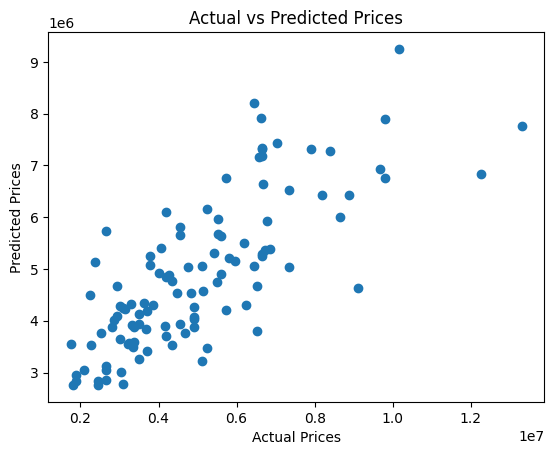

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean R² Score: {scores.mean()}")# fine-tuning the model using GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {'fit_intercept': [True, False]}

# Perform GridSearchCV
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Display the best parameters
print(f"Best Parameters: {grid.best_params_}")
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")

In [ ]:
# Perform cross-validation to ensure the model generalizes well.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean R² Score: {scores.mean()}")

In [ ]:
# Save the model using pickle
import pickle
# Save the model to a file
with open('housing_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
# Load the model from the file  
with open('housing_price_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
# Make predictions using the loaded model
y_pred_loaded = loaded_model.predict(X_test)
# Compare predictions from the original and loaded model
comparison_df = pd.DataFrame({'Original Predictions': y_pred, 'Loaded Model Predictions': y_pred_loaded})

In [ ]:
display(comparison_df.head())

In [34]:
from sklearn.metrics import r2_score

# Calculate R² score for the test set
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2 * 100:.2f}%")

R² Score: 56.87%
